## Example: Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scratch.algos.logistic import LogisticRegression
from scratch.utils.evaluation import *

plt.rcParams["figure.figsize"] = (20, 10)
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [2]:
cancer = (
    pd.read_csv("../data/BreastCancer.csv", header=0)
    .sample(frac=1)
    .dropna(axis=0)
    .drop(columns=["id"])
    .replace({"diagnosis": {"M": 1, "B": 0}})
)
print("Dimensions:", cancer.shape)
print("Columns:", cancer.columns)

nvalid = int(np.floor(cancer.shape[0] * 0.3))

scaler = StandardScaler()

dftrain = cancer.head(n=-nvalid)
Xtrain = dftrain.drop(columns=["diagnosis"]).to_numpy()
XtrainS = scaler.fit_transform(Xtrain)
ytrain = dftrain["diagnosis"].values

dfvalid = cancer.tail(n=nvalid)
Xvalid = dfvalid.drop(columns=["diagnosis"]).to_numpy()
XvalidS = scaler.transform(Xvalid)
yvalid = dfvalid["diagnosis"].values

assert len(cancer) == len(XtrainS) + len(XvalidS), "Dimensions do not match"

Dimensions: (567, 11)
Columns: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


In [3]:
m = LogisticRegression(learning_rate=0.01, tol_err=1e-06, max_iters=10000)
m.fit(X=XtrainS, y=ytrain)

print("Feature weights:", m.weights)
print("Bias term:", m.bias)
print("Number of iterations:", m.iters)

yprob_train, yclass_train = m.predict(X=XtrainS)
yprob_valid, yclass_valid = m.predict(X=XvalidS)

Feature weights: [ 0.95955917  1.15635261  0.94667534  1.00665289  0.52208596  0.32069258
  0.91300531  1.09368124  0.29152037 -0.33272804]
Bias term: -0.6832173291388913
Number of iterations: 6291


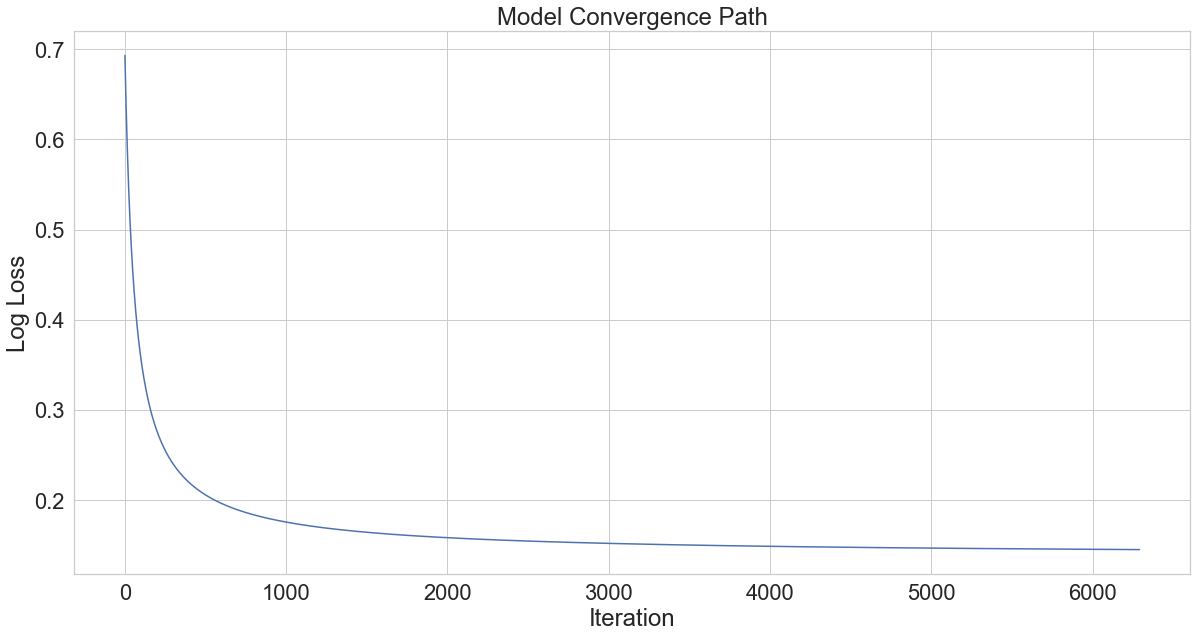

In [4]:
plt.plot(m.loss)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Model Convergence Path")
plt.show()

In [5]:
build_confusion_matrix(y=ytrain, yhat=yclass_train, as_percentage=False)

YHAT,0,1
Y,,
0,245,7
1,17,128


In [6]:
build_confusion_matrix(y=yvalid, yhat=yclass_valid, as_percentage=False)

YHAT,0,1
Y,,
0,103,2
1,9,56
